
- One of the most common and interesting types of experiment
  involves the measurement of several values of two different physical
  quantities, in order to investigate the mathematical relationship.
- Many experiments involve *linear* relations. 
- Consider any two physical variables, $x$ and $y$ that we suspect
  are connected by a linear relation, i.e., 

\begin{equation*}
y = A + Bx
\end{equation*}

- For simplicity, assume that the $x$ errors are negligible, while
  $y$ can suffer some uncertainty.  
- Assume that the $y$ errors are governed by a Guassian
  distribution, with the same width parameter, $\sigma_y$, for all
  measurements.
- If we knew $x_i$, $A$, and $B$,  then 

\begin{equation*}
y_i = A+Bx_i
\end{equation*}

- The measurement of $y_i$ is governed by a normal distribution
  centered on its ``true'' value.  
- The probability of obtaining the observed value $y_i$ is

\begin{equation*}
P_{A,B}(y_i) \propto \frac{1}{\sigma_y} e^{-(y_i - A - Bx_i)^2/(2 \sigma_y^2)}
\end{equation*}

where the subscripts $A$ and $B$ indicate that this probability
depends on the (unknown) values of $A$ and $B$.  
- The probability of obtaining our complete set of measurements
  $y_1, \cdot \cdot \cdot, y_N$, is the product

\begin{equation*}
P_{A,B}(y_1, \cdot \cdot \cdot, y_N)=P_{A,B}(y_1) \cdot \cdot \cdot
P_{A,B}(y_N) \propto \frac{1}{\sigma_y^N} e^{-\chi^2/2}
\end{equation*}

where 

\begin{equation*}
\chi^2 = \sum_{i-1}^N \frac{(y_i - A - Bx_i)^2}{\sigma_y^2}
\end{equation*}

- The best estimates for the unknown constants $A$ and $B$, based
  on the given measurements, are those values of $A$ and $B$ for which
  the probability $P_{A,B}(y_1, \cdot \cdot \cdot, y_N)$ is maximum,
  or for which the sum of squares, $\chi^2$, is a *minimum* (i.e.,
  least-squares fitting).
- To find the minimum, take derivatives...

\begin{equation*}
\frac{\partial \chi^2}{\partial A} = (-2/\sigma_y^2) \sum_{i=1}^N(y_i
- A - Bx_i) = 0
\end{equation*}

and 

\begin{equation*}
\frac{\partial \chi^2}{\partial B} = (-2/\sigma_y^2) \sum_{i=1}^N x_i(y_i
- A - Bx_i) = 0
\end{equation*}

- These two equations can be rewritten as simultaneous equations
  for $A$ and $B$:

\begin{equation*}
AN + B \sum x_i = \sum y_i
\end{equation*}

and

\begin{equation*}
A \sum x_i + b \sum x_i^2 = \sum x_i y_i
\end{equation*}

- Solving the *normal equations* yields the least-squares
  estimates for $A$ and $B$, i.e.,

\begin{equation*}
A = \frac{(\sum x_i^2)(\sum y_i) - (\sum x_i)(\sum x_i y_i)}{\Delta}
\end{equation*}

and

\begin{equation*}
B = \frac{N(\sum x_i y_i) - (\sum x_i)(\sum y_i)}{\Delta}
\end{equation*}

where 

\begin{equation*}
\Delta = N \left (\sum x_i^2 \right ) - \left (\sum x_i \right)^2
\end{equation*}

- Uncertainty in $y$ should be determined when analyzing the
  data.  However, we can estimate the uncertainty, $\sigma_y$, by
  assuming the $y_i$ are normally distributed about the true value $A + Bx_i$, with
  width parameter $\sigma_y$.  This suggests (based on the probability
  of obtaining values $y_1 \cdot \cdot \cdot y_N$ is maximum, i.e.,
  take derivative w.r.t. $\sigma_y$ and set it equal to zero).

\begin{equation*}
\sigma_y^2 = \frac{1}{N} \sum (y_i - A - B x_i)^2
\end{equation*}

- Having found $\sigma_y$, the uncertainties in A and B are found
  by simple error propagation.

\begin{align*}
\sigma_A^2 &= \frac{1}{\Delta}\sigma_y^2 \sum x_i^2\\
\sigma_B^2 &= \frac{1}{\Delta}N \sigma_y^2\\
\end{align*}

# Problem 1

Determine the best fit cooling rate, $R$, from the coffee cup data in Lab 2. Recall, the cooling law is

$$ \frac{dT(t)}{dt} = -R (T - T_s)$$

We are looking for a function of the form $T(t) = Ae^{-Rt}$ such that the linear equation is $\ln T = \ln A -Rt$.  We can use a trick to write the cooling law in this form by noting that $dT_s/dt = 0$, or

$$ \frac{d[T(t)-T_s]}{dt} = -R (T - T_s)$$

Let $y = T- T_s$, so 

$$ \frac{d y }{dt} = -R y$$

The solution is $y(t) = y^0 e^{-Rt}$, and $\ln y = \ln y^0 -R t$ where $y^0 = y(t^0)$. Note this is a semi-log fit.

Compare your result with the python linear regression method used in Lab 3. 

slope =  [-0.03321461]  intercept = 4.031445880660588
least sqaures slope= [-0.03375957] intercept = 4.0356332093460825


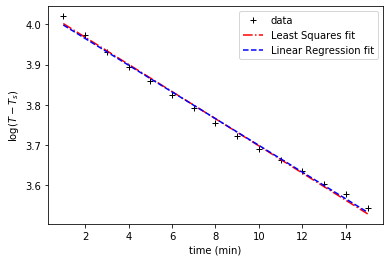

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Add experimental data
Ts = 22.0  #room temperature

time = np.arange(0,16,1)  #independent variable, i.e., x_i
Temp = np.array([83.0, 77.7, 75.1, 73.0, 71.1, 69.4, 67.8, 66.4, 64.7, 63.4, 62.1, 61.0, 59.9, 58.7, 57.8, 56.6]) 

y = Temp[1:] - Ts  #remove the first data point
tm = time[1:]

#Data Graph
plt.plot(tm,np.log(y),'k+',label='data')
plt.xlabel('time (min)')
plt.ylabel('log($T - T_s$)')

#Add your least squares fit code here.....
#A lot of the sums repeat, so I set them aside as variables 
#the code could be written in two (or three) lines if I skipped this and wrote one line of code for each A & B 
#(but this seems easier to read)
x2sum = np.sum(time**2)                    #sum of x^2 terms
xsum = np.sum(time)                        #sum of x terms
ysum = np.sum(y)                           #sum of y terms
xysum = np.sum(y*tm)                       #sum of x*y terms
N = 15                                     #15 terms (should've used len(x))
delta = (N*x2sum) - (xsum)**2              #delta

def A(x2sum,ysum,xsum,xysum,delta):         #Function for A
    return(x2sum*ysum - xsum*xysum)/delta

def B(N,xysum,xsum,ysum,delta):             #Function for B
    return (N*xysum - xsum*ysum)/delta

yi = A(x2sum,ysum,xsum,xysum,delta) + B(N,xysum,xsum,ysum,delta)*tm

#sklearn LinearRegression result.
model=LinearRegression()
t = tm.reshape((-1,1))
model.fit(t,np.log(y))
print('slope = ', model.coef_,' intercept =', model.intercept_)


#Least squares Lin. Reg
least=LinearRegression()
least.fit(t,np.log(yi))
print("least sqaures slope=", least.coef_,"intercept =",least.intercept_)

#Linear regression graphs
plt.plot(tm,least.intercept_ + least.coef_*tm,"r-.",label= "Least Squares fit")
plt.plot(tm,model.intercept_ + model.coef_*tm,"b--",label='Linear Regression fit')
plt.legend()

# Problem 2

Calculate the uncertainty in $R$.

In [4]:
#uncertainty in R (uncertainty in B)
sig_y2 = (1/N)*np.sum(y - A(x2sum,ysum,xsum,xysum,delta) + B(N,xysum,xsum,ysum,delta)*tm)**2     #sigma_y sqaured
sig_B2 = (1/delta)*N*sig_y2                                 #sigma_B squared (b/c B = R in this case)
print ("Uncertainty in R =",np.sqrt(sig_B2))

Uncertainty in R = 5.38827298067625
